# Fama-French 5 Factor Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import yfinance as yf
import matplotlib.pyplot as plt

## get data and preview it

### factors for the model

In [23]:
fama_fr = pd.read_csv(r"F-F_Research_Data_5_Factors_2x3_daily.CSV", skiprows=3, index_col=0)
fama_fr.index =fama_fr.index.astype(str)
fama_fr.tail()


,Mkt-RF,SMB,HML,RMW,CMA,RF
20241224,1.11,-0.12,-0.05,-0.13,-0.37,0.017
20241226,0.02,1.09,-0.19,-0.44,0.35,0.017
20241227,-1.17,-0.44,0.56,0.41,0.03,0.017
20241230,-1.09,0.24,0.74,0.55,0.14,0.017
20241231,-0.46,0.31,0.71,0.33,0.00,0.017


In [73]:
fama_fr_latex = fama_fr.tail().map(lambda x: "{:.2f}".format(x))

# Generate LaTeX table
fama_latex_table = fama_fr_latex.to_latex(escape=False)  # escape=False prevents double escaping
print(fama_latex_table)

\begin{tabular}{lllllll}
\toprule
 & Mkt-RF & SMB & HML & RMW & CMA & RF \\
\midrule
20241224 & 1.11 & -0.12 & -0.05 & -0.13 & -0.37 & 0.02 \\
20241226 & 0.02 & 1.09 & -0.19 & -0.44 & 0.35 & 0.02 \\
20241227 & -1.17 & -0.44 & 0.56 & 0.41 & 0.03 & 0.02 \\
20241230 & -1.09 & 0.24 & 0.74 & 0.55 & 0.14 & 0.02 \\
20241231 & -0.46 & 0.31 & 0.71 & 0.33 & 0.00 & 0.02 \\
\bottomrule
\end{tabular}



### pick MSFT as stock

In [76]:
stock_yahoo = yf.Ticker("MSFT")

In [80]:
last20y = stock_yahoo.history(period="20y")
last20y.index = last20y.index.strftime("%Y%m%d")
last20y.drop(columns=["Dividends", "Stock Splits", "Volume"], inplace=True)
last20y["return"] = last20y["Close"].pct_change()
last20y.dropna(inplace=True)
last20y.tail()

,Open,High,Low,Close,return
Date,,,,,
20250225,401.100006,401.920013,396.700012,397.899994,-0.015099
20250226,398.010010,403.600006,394.250000,399.730011,0.004599
20250227,401.269989,405.739990,392.170013,392.529999,-0.018012
20250228,392.660004,397.630005,386.570007,396.989990,0.011362
20250303,398.820007,398.820007,386.160004,388.489990,-0.021411


In [82]:
# use 2 digits after the decimal point
stock_latex = last20y.tail().map(lambda x: "{:.3f}".format(x))

# Generate LaTeX table
stock_latex_table = stock_latex.to_latex(escape=False)  # escape=False prevents double escaping
print(stock_latex_table)

\begin{tabular}{llllll}
\toprule
 & Open & High & Low & Close & return \\
Date &  &  &  &  &  \\
\midrule
20250225 & 401.100 & 401.920 & 396.700 & 397.900 & -0.015 \\
20250226 & 398.010 & 403.600 & 394.250 & 399.730 & 0.005 \\
20250227 & 401.270 & 405.740 & 392.170 & 392.530 & -0.018 \\
20250228 & 392.660 & 397.630 & 386.570 & 396.990 & 0.011 \\
20250303 & 398.820 & 398.820 & 386.160 & 388.490 & -0.021 \\
\bottomrule
\end{tabular}



### merge and check excess return

In [50]:
fama_fr_msft_last20y = pd.merge(
    last20y["return"],
    fama_fr,
    left_index=True,
    right_index=True,
    how="inner"
)
fama_fr_msft_last20y["excess_return"] = fama_fr_msft_last20y["return"] - fama_fr_msft_last20y["RF"]/100
fama_fr_msft_last20y


,return,Mkt-RF,SMB,HML,RMW,CMA,RF,excess_return
20050307,0.011920,0.27,-0.43,0.14,-0.33,0.16,0.010,0.011820
20050308,-0.002748,-0.54,-0.38,0.02,0.23,-0.17,0.010,-0.002848
20050309,-0.003543,-0.96,0.00,-0.09,-0.18,0.56,0.010,-0.003643
20050310,0.004741,0.01,-0.84,-0.13,0.01,0.14,0.010,0.004641
20050311,-0.013370,-0.55,0.61,0.42,0.17,0.11,0.010,-0.013470
...,...,...,...,...,...,...,...,...
20241224,0.009374,1.11,-0.12,-0.05,-0.13,-0.37,0.017,0.009204
20241226,-0.002777,0.02,1.09,-0.19,-0.44,0.35,0.017,-0.002947
20241227,-0.017302,-1.17,-0.44,0.56,0.41,0.03,0.017,-0.017472
20241230,-0.013240,-1.09,0.24,0.74,0.55,0.14,0.017,-0.013410


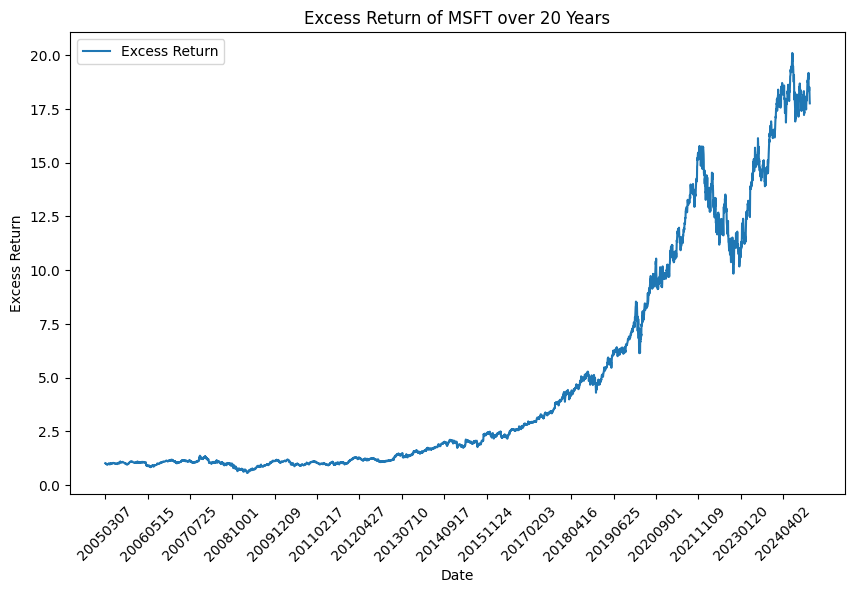

In [53]:
# plot excess return as function of time
plt.figure(figsize=(10, 6))
plt.plot(fama_fr_msft_last20y.index, (1 + fama_fr_msft_last20y["excess_return"]).cumprod(), label="Excess Return")
plt.title("Excess Return of MSFT over 20 Years")
xtick_indices = np.arange(0, len(fama_fr_msft_last20y.index), 300)
plt.xticks(fama_fr_msft_last20y.index[xtick_indices], rotation=45)
plt.xlabel("Date")
plt.ylabel("Excess Return")
plt.legend()
plt.show()

## Do regression with sklearn

In [ ]:
X = fama_fr_msft_last20y[["Mkt-RF", "SMB", "HML", "RMW", "CMA"]]
y = fama_fr_msft_last20y["excess_return"]
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(X, y))


Intercept: 0.00020720675127399466
Coefficients: [ 0.01128495 -0.00369999 -0.00378986  0.00249309 -0.00161599]
R-squared: 0.6079755982101198


### show replicated results

In [57]:
predicted_Y = model.predict(X)

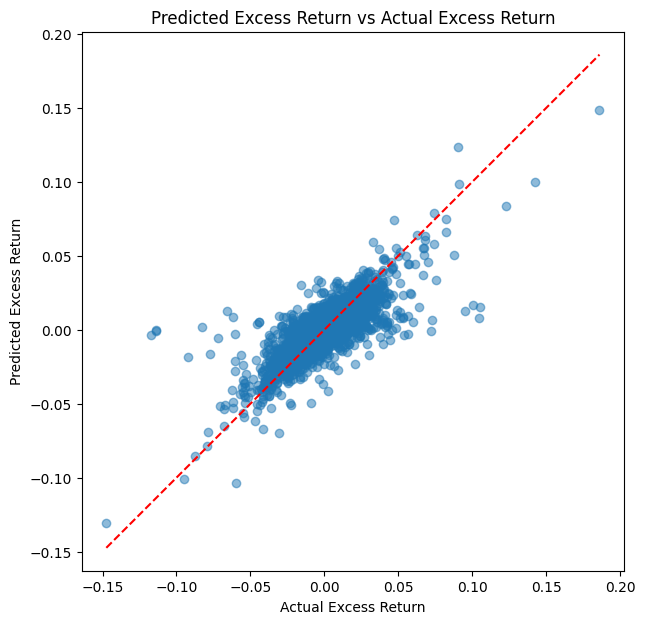

In [ ]:
# plot the predicted excess return as function of the actual excess return
plt.figure(figsize=(7, 7))  # Ensure the figure itself is square
plt.scatter(fama_fr_msft_last20y["excess_return"], predicted_Y, alpha=0.5)
plt.title("Predicted Excess Return vs Actual Excess Return")
plt.xlabel("Actual Excess Return")
plt.ylabel("Predicted Excess Return")

min_val = min(fama_fr_msft_last20y["excess_return"].min(), predicted_Y.min())
max_val = max(fama_fr_msft_last20y["excess_return"].max(), predicted_Y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)
plt.axis("equal")  # Ensures the aspect ratio is 1:1
plt.savefig("predicted_vs_actual_excess_return.pdf", bbox_inches='tight')
plt.show()



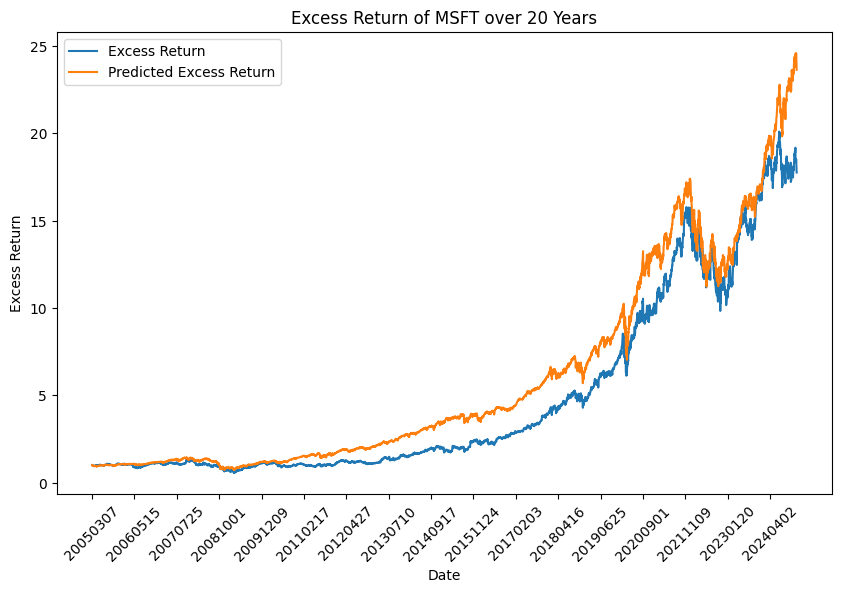

In [92]:
# show comulative returns
plt.figure(figsize=(10, 6))
plt.plot(fama_fr_msft_last20y.index, (1 + fama_fr_msft_last20y["excess_return"]).cumprod(), label="Excess Return")
plt.plot(fama_fr_msft_last20y.index, (1 + predicted_Y).cumprod(), label="Predicted Excess Return")
plt.title("Excess Return of MSFT over 20 Years")
xtick_indices = np.arange(0, len(fama_fr_msft_last20y.index), 300)
plt.xticks(fama_fr_msft_last20y.index[xtick_indices], rotation=45)
plt.xlabel("Date")
plt.ylabel("Excess Return")
plt.legend()
plt.savefig("cumulative_excess_return.pdf", bbox_inches='tight')
plt.show()
